In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.groupby('koi_disposition').count()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,...,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
CONFIRMED,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
FALSE POSITIVE,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,...,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


<AxesSubplot:xlabel='koi_disposition'>

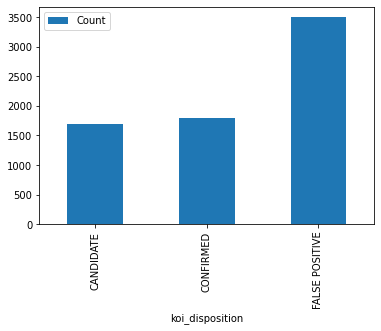

In [6]:
grouped_df = df[['koi_disposition','koi_fpflag_nt']].groupby('koi_disposition').count()
grouped_df = grouped_df.rename(columns={"koi_fpflag_nt":"Count"})
grouped_df.plot(kind="bar")

# Selecting all 40 features (columns)

In [7]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [8]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

## Use koi_disposition for the y values

In [9]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (6991, 40) (6991, 1)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y.flatten())
encoded_y = label_encoder.transform(y.flatten())
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [11]:
encoded_y = encoded_y.reshape(-1, 1)

In [12]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded La

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Ori

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']


------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CAND

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE

------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: [

Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITI

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class:

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']


Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded La

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class:

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded La

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Or

In [13]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [14]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [15]:
y_train.shape

(5243, 1)

# Pre-processing

## Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the Model

In [18]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000)
model2

LogisticRegression(max_iter=1000)

In [19]:
model2.fit(X_train_scaled, y_train.flatten())

LogisticRegression(max_iter=1000)

In [20]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8483692542437535
Testing Data Score: 0.8443935926773455


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
model2.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [22]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'penalty': ['l2','none'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced", None]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [23]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.856, total=   0.4s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.844, total=   0.4s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.859, total=   0.4s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.827, total=   0.3s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.840, total=   0.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   1.6s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.891, total=   1.5s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.869, total=   1.6s
[CV] C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.883, total=   1.5s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.861, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.841, total=   0.3s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.860, total=   0.3s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.835, total=   0.4s
[CV] C=1, class_weight=balanced, penalty=l2 ..........................
[CV]  C=1, class_weight=balanced, penalty=l2, score=0.844, total=   0.5s
[CV] C=1, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.888, total=   1.4s
[CV] C=1, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.888, total=   1.4s
[CV] C=1, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.891, total=   1.4s
[CV] C=1, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.872, total=   1.3s
[CV] C=1, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, penalty=none, score=0.885, total=   1.4s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.856, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.843, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.858, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.827, total=   0.3s
[CV] C=1, class_weight=None, penalty=l2 ..............................
[CV] .. C=1, class_weight=None, penalty=l2, score=0.839, total=   0.3s
[CV] C=1, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.892, total=   1.3s
[CV] C=1, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.884, total=   1.4s
[CV] C=1, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.895, total=   1.4s
[CV] C=1, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.870, total=   1.4s
[CV] C=1, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=None, penalty=none, score=0.884, total=   1.5s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.879, total=   0.8s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.855, total=   0.6s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.877, total=   0.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.848, total=   0.8s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ................
[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.864, total=   0.7s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.3s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   1.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.891, total=   1.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.869, total=   1.4s
[CV] C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none ..............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.883, total=   1.5s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.877, total=   0.9s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.859, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.881, total=   0.8s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.846, total=   0.6s
[CV] C=5, class_weight=balanced, penalty=l2 ..........................
[CV]  C=5, class_weight=balanced, penalty=l2, score=0.863, total=   0.7s
[CV] C=5, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=5, class_weight=balanced, penalty=none, score=0.888, total=   1.4s
[CV] C=5, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.888, total=   1.4s
[CV] C=5, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.891, total=   1.3s
[CV] C=5, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=balanced, penalty=none, score=0.872, total=   1.4s
[CV] C=5, class_weight=balanced, penalty=none ........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=balanced, penalty=none, score=0.885, total=   1.4s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.877, total=   0.8s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.855, total=   0.7s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.877, total=   0.6s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.846, total=   0.6s
[CV] C=5, class_weight=None, penalty=l2 ..............................
[CV] .. C=5, class_weight=None, penalty=l2, score=0.864, total=   0.8s
[CV] C=5, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=5, class_weight=None, penalty=none, score=0.892, total=   1.4s
[CV] C=5, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.884, total=   1.4s
[CV] C=5, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.895, total=   1.4s
[CV] C=5, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, class_weight=None, penalty=none, score=0.870, total=   1.3s
[CV] C=5, class_weight=None, penalty=none ............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=5, class_weight=None, penalty=none, score=0.884, total=   1.4s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.882, total=   1.0s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.861, total=   1.1s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.883, total=   0.9s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.854, total=   1.0s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............
[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.865, total=   0.9s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   1.5s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.891, total=   1.4s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.869, total=   1.4s
[CV] C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.883, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.883, total=   1.0s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   1.0s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.888, total=   0.9s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.858, total=   0.9s
[CV] C=10, class_weight=balanced, penalty=l2 .........................
[CV]  C=10, class_weight=balanced, penalty=l2, score=0.867, total=   1.0s
[CV] C=10, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=10, class_weight=balanced, penalty=none, score=0.888, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.888, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.891, total=   1.4s
[CV] C=10, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, penalty=none, score=0.872, total=   1.3s
[CV] C=10, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=balanced, penalty=none, score=0.885, total=   1.3s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.882, total=   1.0s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.860, total=   0.8s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.885, total=   0.7s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.851, total=   1.1s
[CV] C=10, class_weight=None, penalty=l2 .............................
[CV] . C=10, class_weight=None, penalty=l2, score=0.865, total=   1.1s
[CV] C=10, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting pe

[CV]  C=10, class_weight=None, penalty=none, score=0.892, total=   1.3s
[CV] C=10, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.884, total=   1.5s
[CV] C=10, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.895, total=   1.4s
[CV] C=10, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=None, penalty=none, score=0.870, total=   1.3s
[CV] C=10, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, class_weight=None, penalty=none, score=0.884, total=   1.4s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.894, total=   1.3s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.873, total=   1.3s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.889, total=   1.3s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.862, total=   1.4s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2 ...............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=l2, score=0.874, total=   1.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.896, total=   1.4s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.884, total=   1.4s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.891, total=   1.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.869, total=   1.6s
[CV] C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none .............


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight={0: 1, 1: 1, 2: 2}, penalty=none, score=0.883, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.891, total=   1.3s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.874, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.895, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.867, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=l2 .........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=l2, score=0.874, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.888, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.888, total=   1.5s
[CV] C=50, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.891, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=balanced, penalty=none, score=0.872, total=   1.4s
[CV] C=50, class_weight=balanced, penalty=none .......................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, class_weight=balanced, penalty=none, score=0.885, total=   1.3s
[CV] C=50, class_weight=None, penalty=l2 .............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.890, total=   1.3s
[CV] C=50, class_weight=None, penalty=l2 .............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.872, total=   1.3s
[CV] C=50, class_weight=None, penalty=l2 .............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.889, total=   1.4s
[CV] C=50, class_weight=None, penalty=l2 .............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . C=50, class_weight=None, penalty=l2, score=0.862, total=   1.4s
[CV] C=50, class_weight=None, penalty=l2 .............................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] . C=50, class_weight=None, penalty=l2, score=0.873, total=   1.3s
[CV] C=50, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.892, total=   1.2s
[CV] C=50, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.884, total=   1.3s
[CV] C=50, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.895, total=   1.3s
[CV] C=50, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=50, class_weight=None, penalty=none, score=0.870, total=   1.3s
[CV] C=50, class_weight=None, penalty=none ...........................


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.2min finished


[CV]  C=50, class_weight=None, penalty=none, score=0.884, total=   1.3s


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 5, 10, 50],
                         'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced', None],
                         'penalty': ['l2', 'none']},
             verbose=3)

In [24]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'class_weight': None, 'penalty': 'none'}
0.8849864283687117


In [25]:
# Make predictions with the hypertuned model
predictions = grid2.predict(X_test_scaled)

In [26]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.flatten(), predictions,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.71      0.75       411
     CONFIRMED       0.78      0.84      0.81       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.85      0.85      1748
  weighted avg       0.88      0.88      0.88      1748



In [27]:
# from sklearn.linear_model import LogisticRegression
hypertuned_model = LogisticRegression(C=1, class_weight=None, max_iter=1000, penalty='none')
hypertuned_model

LogisticRegression(C=1, max_iter=1000, penalty='none')

In [28]:
hypertuned_model.fit(X_train_scaled, y_train.flatten())

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, max_iter=1000, penalty='none')

In [29]:
print(f"Training Data Score: {hypertuned_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertuned_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8899485027655922
Testing Data Score: 0.8832951945080092


# Feature Selection


## Method 1 - Using Coefficient value


/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


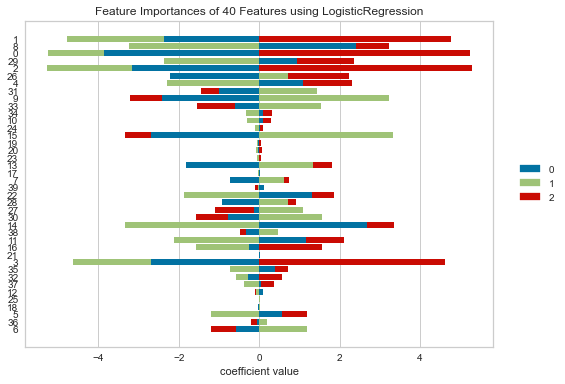

<AxesSubplot:title={'center':'Feature Importances of 40 Features using LogisticRegression'}, xlabel='coefficient value'>

In [30]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model2, stack=True, relative=False)
viz.fit(X_train_scaled, y_train)
viz.show()

# Method 2 - Using Select From Model (SFM)

In [31]:
from sklearn.feature_selection import SelectFromModel
# smf = SelectFromModel(model2, threshold=np.inf, max_features=40)
smf = SelectFromModel(model2, max_features=40)
smf.fit(X_train_scaled, y_train.flatten())
feature_idx = smf.get_support()
feature_name = selected_features.columns[feature_idx]
feature_name

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err2'],
      dtype='object')

## Choosing features from SFM

In [34]:
# Set top features suggested by SFM. This will be used as x values.
sfm_features = df[[ 
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err2']]
sfm_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_slogg_err2
0,0,0,0,0,54.418383,0.003520,-0.003520,0.059,4.50700,0.11600,-0.11600,874.8,443,25.8,81,-81,-0.096
1,0,1,0,0,19.899140,0.000581,-0.000581,5.126,1.78220,0.03410,-0.03410,10829.0,638,76.3,158,-176,-0.176
2,0,1,0,0,1.736952,0.000115,-0.000115,0.115,2.40641,0.00537,-0.00537,8079.2,1395,505.6,157,-174,-0.168
3,0,0,0,0,2.525592,0.001130,-0.001130,0.235,1.65450,0.04200,-0.04200,603.3,1406,40.9,169,-211,-0.210
4,0,0,0,0,4.134435,0.001900,-0.001900,0.139,3.14020,0.06730,-0.06730,686.0,1160,40.2,189,-232,-0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,0.015700,-0.015700,0.023,4.80600,0.63400,-0.63400,87.7,929,8.4,169,-152,-0.189
6987,0,1,1,0,0.527699,0.000170,-0.000170,0.051,3.22210,0.01740,-0.01740,1579.2,2088,453.3,139,-166,-0.196
6988,0,0,0,0,1.739849,0.007690,-0.007690,0.423,3.11400,0.22900,-0.22900,48.5,1608,10.6,165,-220,-0.224
6989,0,0,1,0,0.681402,0.002850,-0.002850,0.309,0.86500,0.16200,-0.16200,103.6,2218,12.3,193,-236,-0.224


# Create Train Test Split with SFM features

In [35]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X_sfm = sfm_features
y_sfm = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X_sfm.shape, y_sfm.shape)

Shape:  (6991, 17) (6991, 1)


In [36]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_sfm.flatten())
encoded_y_sfm = label_encoder.transform(y_sfm.flatten())
encoded_y_sfm

array([1, 2, 2, ..., 0, 2, 2])

In [37]:
encoded_y_sfm = encoded_y_sfm.reshape(-1, 1)
encoded_y_sfm

array([[1],
       [2],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [38]:
for label, original_class in zip(encoded_y_sfm, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE P

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
-----------

------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONF

Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Enc

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONF

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encod

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
----------

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
-

Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: 

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Cla

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: 

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
-----

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITI

Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
-

In [39]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train_sfm, X_test_sfm, y_train_sfm, y_test_sfm = train_test_split(X_sfm, encoded_y_sfm, random_state=42)

# Pre-processing - SFM features data

In [42]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax_sfm = MinMaxScaler().fit(X_train_sfm)

X_train_scaled_sfm = X_minmax_sfm.transform(X_train_sfm)
X_test_scaled_sfm = X_minmax_sfm.transform(X_test_sfm)

# Train the Model with SFM Features¶

In [43]:
from sklearn.linear_model import LogisticRegression
model_sfm = LogisticRegression(max_iter=500)
model_sfm

model_sfm.fit(X_train_scaled_sfm, y_train_sfm.flatten())

print(f"Training Data Score: {model_sfm.score(X_train_scaled_sfm, y_train_sfm)}")
print(f"Testing Data Score: {model_sfm.score(X_test_scaled_sfm, y_test_sfm)}")

Training Data Score: 0.8464619492656876
Testing Data Score: 0.8323798627002288


# Hyperparameter Tuning on SFM Features